# 유형별 임대주택 설계 시 단지 내 적정 주차 수요를 예측

In [1]:
## 기본 설치
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

In [2]:
## 데이터 읽기
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.shape, test.shape

((2952, 15), (1022, 14))

In [4]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [5]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [6]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [7]:
test.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수'],
      dtype='object')

In [8]:
train.dtypes

단지코드                             object
총세대수                              int64
임대건물구분                           object
지역                               object
공급유형                             object
전용면적                            float64
전용면적별세대수                          int64
공가수                             float64
자격유형                             object
임대보증금                            object
임대료                              object
도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
도보 10분거리 내 버스정류장 수              float64
단지내주차면수                         float64
등록차량수                           float64
dtype: object

In [9]:
test.dtypes

단지코드                             object
총세대수                              int64
임대건물구분                           object
지역                               object
공급유형                             object
전용면적                            float64
전용면적별세대수                          int64
공가수                             float64
자격유형                             object
임대보증금                            object
임대료                              object
도보 10분거리 내 지하철역 수(환승노선 수 반영)    float64
도보 10분거리 내 버스정류장 수              float64
단지내주차면수                         float64
dtype: object

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

### 임대보증금, 임대료, 도보 10분 거리 내 지하철역 수, 도보 10분 거리 내 버스정류장 수 Null 존재

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          1022 non-null   object 
 1   총세대수                          1022 non-null   int64  
 2   임대건물구분                        1022 non-null   object 
 3   지역                            1022 non-null   object 
 4   공급유형                          1022 non-null   object 
 5   전용면적                          1022 non-null   float64
 6   전용면적별세대수                      1022 non-null   int64  
 7   공가수                           1022 non-null   float64
 8   자격유형                          1020 non-null   object 
 9   임대보증금                         842 non-null    object 
 10  임대료                           842 non-null    object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  980 non-null    float64
 12  도보 10분거리 내 버스정류장 수            1022 non-null   float64
 13  단지내

### 자격유형, 임대보증금, 임대료, 도보 10분거리 내 지하철역 수 Null 존재

In [13]:
train.공급유형.value_counts()

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [14]:
test.공급유형.value_counts()

국민임대         622
임대상가         177
행복주택         124
영구임대          45
공공임대(10년)     35
공공임대(50년)     13
공공임대(분납)       6
Name: 공급유형, dtype: int64

### 공급유형 종류 : 국민임대, 임대상가, 행복주택, 영구음대, 공공임대(10년, 50년, 분납), 장기전세, 공공분양

In [15]:
train.임대건물구분.value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

In [16]:
test.임대건물구분.value_counts()

아파트    845
상가     177
Name: 임대건물구분, dtype: int64

### 임대건물구분 종류: 아파트, 상가

In [17]:
train.자격유형.value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
L      33
K      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [18]:
test.자격유형.value_counts()

A    572
D    180
H     92
J     84
C     34
K     16
L     12
E     10
N     10
I      7
M      2
G      1
Name: 자격유형, dtype: int64

### 자격유형: A, B, C, D, E, F, G, H, I, J, K, L, M, N, O  15가지 존재

In [19]:
train.지역.value_counts()

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

In [21]:
test.지역.value_counts()

경기도        259
강원도        106
부산광역시       88
경상남도        85
울산광역시       73
경상북도        58
대전광역시       56
충청북도        51
광주광역시       46
전라북도        41
충청남도        41
전라남도        37
대구광역시       36
제주특별자치도     26
세종특별자치시     19
Name: 지역, dtype: int64

### 지역은 전국적으로 다양하게 존재

## 기타 다른 값 확인

In [22]:
train.단지코드.value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C2651     2
C2437     1
C2340     1
C2520     1
C2188     1
Name: 단지코드, Length: 423, dtype: int64

In [23]:
test.단지코드.value_counts()

C2676    46
C2253    31
C1812    27
C1006    27
C2033    25
         ..
C2335     2
C2369     2
C2224     2
C2423     2
C1604     2
Name: 단지코드, Length: 150, dtype: int64

## 결측치 보기

In [29]:
import matplotlib.pyplot as plt
import missingno as msno

<AxesSubplot:>

C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.

C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45824 missing from current font.
  font.se

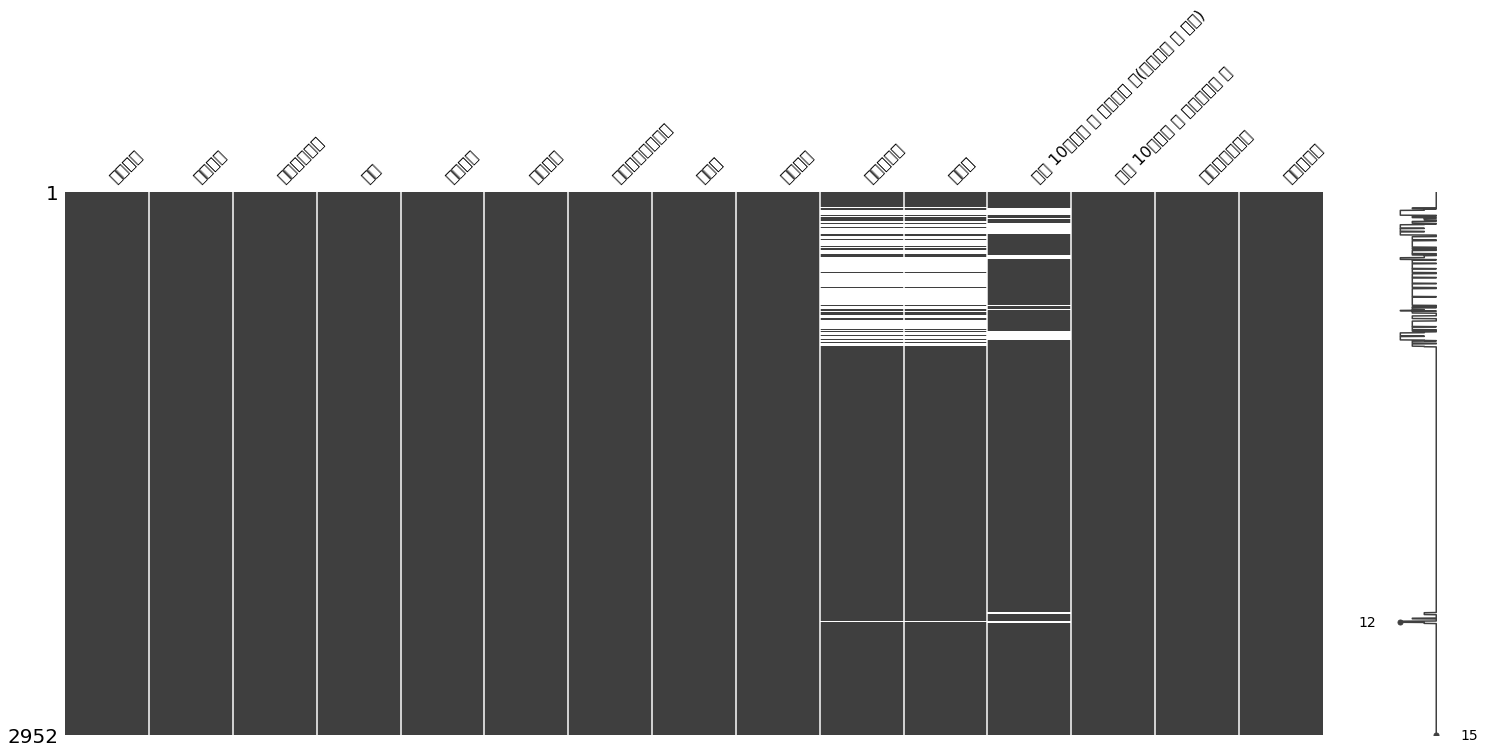

In [30]:
%matplotlib inline
msno.matrix(train)

## 결측치 처리 방안

### 1. 임대보증금, 임대료, 도보 10분 내 거리 지하철 또는 버수의 수의 경우 단지코드, 지역, 공급유형, 전용면적, 전용면적 세대수 등의 값이 비슷한 유형에 맞춰 셋팅
### 2. 도보 10분 내 거리 데이터는 서울, 경기, 광역시권 한정?(지하철이 있는 동네 한정)
### 3. 기존 주차수요 예측에 대한 이해도 필요(법정주차대수, 장래주차수요 중 큰 값 선정)
####   => 장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출, ‘주차원단위’는 신규 건축예정유 부지 인근의 사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법
#### => 피크 시간 방문 때는 언제? 출퇴근? 건축연면적은 변하지 않는 고정값으로 산정